## **KNN Imputer**
* **Find the K nearest neighbours on the basis of nan-euclidean distance**
* **Find the value to be imputed by taking the average of the neighbours**



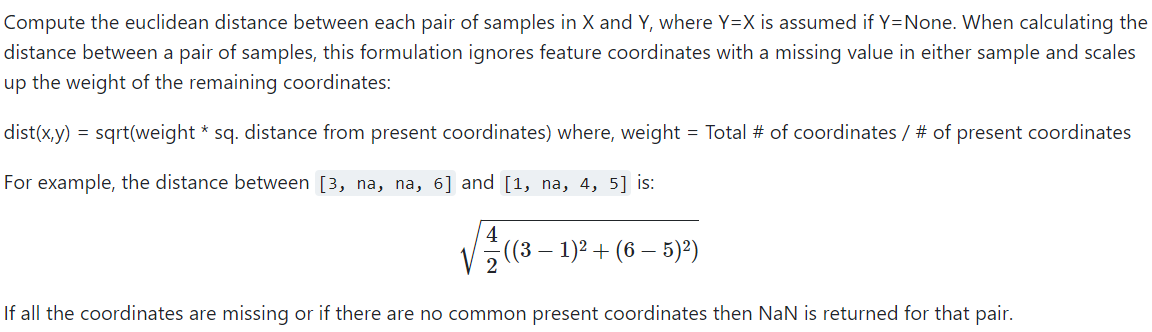

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Survived'])

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

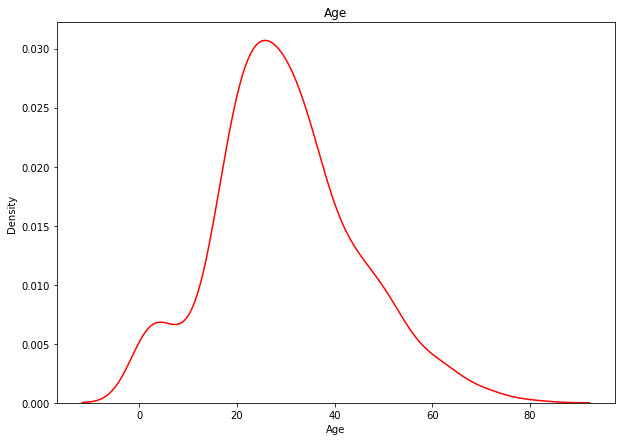

In [70]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Age'],ax=ax,color='red')

plt.title('Age')
plt.show()

In [71]:
from sklearn.impute import KNNImputer

In [72]:
ki = KNNImputer(n_neighbors=3,weights='distance')

X_train = ki.fit_transform(X_train)
X_test = ki.transform(X_test)

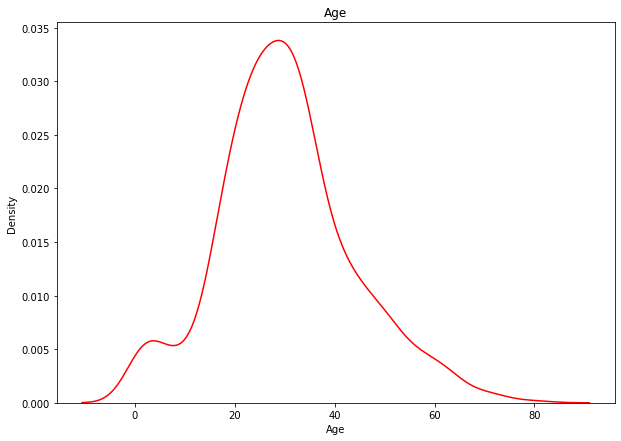

In [73]:
X_train = pd.DataFrame(X_train,columns=['Age','Fare'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Age'],ax=ax,color='red')

plt.title('Age')
plt.show()

## **Multivariate Imputation by Chained Equations**
* **Used when data is MAR (Missing At Random)**
* **It is quite accurate**
* **Disadvantages: It is a slow tenchnique and memory usage is high**

In [74]:
for i in range(1,len(df),50):
  df['Fare'][i] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
df.isnull().sum()

Survived      0
Age         177
Fare         18
dtype: int64

In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

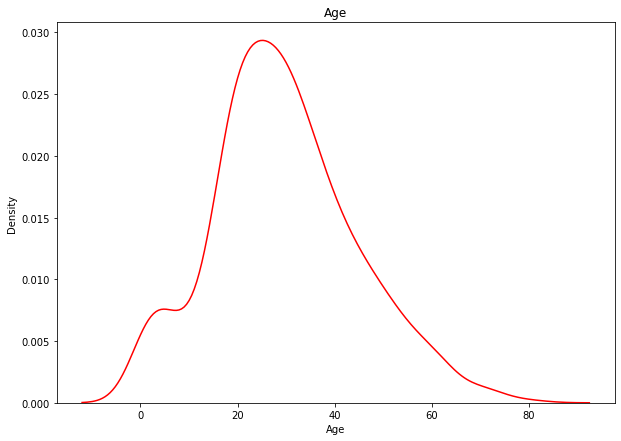

In [78]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Age'],ax=ax,color='red')

plt.title('Age')
plt.show()

In [79]:
imp = IterativeImputer(random_state=0)

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

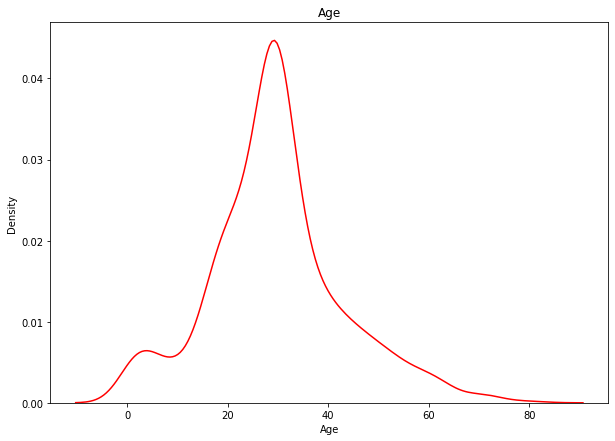

In [80]:
X_train = pd.DataFrame(X_train,columns=['Age','Fare'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Age'],ax=ax,color='red')

plt.title('Age')
plt.show()